# 7. Hafta Lab-3: Yapay Sinir Ağları
## SİB 552: Siber Güvenlik İçin Veri Madenciliği
## Gebze Teknik Üniversitesi - Siber Güvenlik Yüksek Lisans Programı
### Dr. Ferhat Özgür Çatak

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from IPython.display import Image

Using TensorFlow backend.


In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, Input
from keras.utils import plot_model

In [3]:
# veri kumesini oku
kolon_adlari = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent',
'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations',
'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count',
'serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate',
'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate','label']

verikumesi = pd.read_csv("kddcup99.tar.gz",compression="gzip", names=kolon_adlari, 
low_memory=False, skiprows=1)

In [4]:
# ilgili kolonlari sec
secilecek_kolonlar = ['duration','src_bytes','dst_bytes','wrong_fragment','urgent','hot','num_failed_logins',
'num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells',
'num_access_files','num_outbound_cmds','count','srv_count','serror_rate','srv_serror_rate',
'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count',
'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
'dst_host_srv_rerror_rate']
X = verikumesi[secilecek_kolonlar].as_matrix()
Y = verikumesi['label']

c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


### Label encoder

In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

### Yapay sinir ağı modeli oluştur

In [6]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(20, activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(10, activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dense(dummy_y.shape[1], activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#plot_model(model, show_shapes=True, to_file="multiclass.png")
#Image("multiclass.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                350       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 23)                253       
Total params: 1,033
Trainable params: 1,033
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X, dummy_y, epochs=30, batch_size=1024, verbose=1, validation_split=0.33)

Instructions for updating:
Use tf.cast instead.
Train on 330993 samples, validate on 163027 samples
Epoch 1/30
330993/330993 [==============================] - 1s 4us/step - loss: 2.0096 - acc: 0.5959 - val_loss: 1.5041 - val_acc: 0.4247
Epoch 2/30
330993/330993 [==============================] - 1s 3us/step - loss: 1.1260 - acc: 0.6392 - val_loss: 1.3795 - val_acc: 0.4247
Epoch 3/30
330993/330993 [==============================] - 1s 3us/step - loss: 1.0319 - acc: 0.6392 - val_loss: 1.3645 - val_acc: 0.4247
Epoch 4/30
330993/330993 [==============================] - 1s 3us/step - loss: 1.0050 - acc: 0.6392 - val_loss: 1.3436 - val_acc: 0.4247
Epoch 5/30
330993/330993 [==============================] - 1s 3us/step - loss: 0.9491 - acc: 0.6392 - val_loss: 1.2721 - val_acc: 0.4247
Epoch 6/30
330993/330993 [==============================] - 1s 3us/step - loss: 0.8154 - acc: 0.6392 - val_loss: 1.0429 - val_acc: 0.4247
Epoch 7/30
330993/330993 [==============================] - 1s 3us/step 

### Sınıflandırma modelinin performansına bakalım.

In [9]:
y_pred = model.predict_classes(X)

### Confusion Matrix

In [10]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(encoded_Y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,2203,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,6,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,6,0,0,0,0,0,0,5,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1151,0,96,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,107191,0,9,0,0,0,0,0,0,1,0,0,0,0


In [11]:
accuracy_score(encoded_Y, y_pred)

0.9819561961054208

### Eğitim tarihçesini inceliyelim.

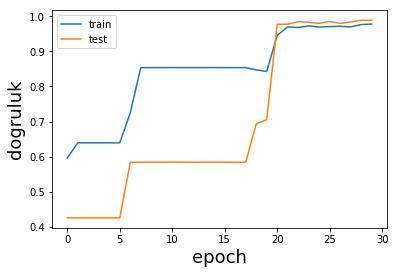

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

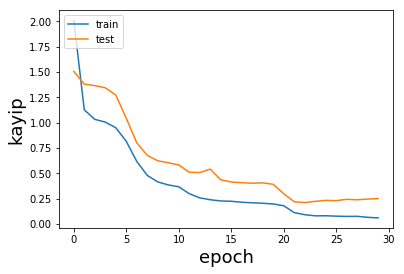

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Model karmaşıklığını artıralım

In [14]:
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(30, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(50, activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(30, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(10, activation='tanh', kernel_initializer='uniform' ))
model.add(Dense(dummy_y.shape[1], activation='softmax', kernel_initializer='uniform'))
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

#plot_model(model, show_shapes=True, to_file="multiclass.png")
#Image("multiclass.png")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                350       
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 23)                253       
Total params: 4,323
Trainable params: 4,323
Non-trainable params: 0
_________________________________________________________________


### Modeli eğitelim

In [15]:
history = model.fit(X, dummy_y, epochs=30, batch_size=1024, verbose=1, validation_split=0.33)

Train on 330993 samples, validate on 163027 samples
Epoch 1/30
330993/330993 [==============================] - 2s 6us/step - loss: 1.4936 - acc: 0.6377 - val_loss: 1.3902 - val_acc: 0.4247
Epoch 2/30
330993/330993 [==============================] - 2s 7us/step - loss: 1.0124 - acc: 0.6392 - val_loss: 1.3977 - val_acc: 0.4261
Epoch 3/30
330993/330993 [==============================] - 2s 7us/step - loss: 0.6713 - acc: 0.7718 - val_loss: 0.3868 - val_acc: 0.9706
Epoch 4/30
330993/330993 [==============================] - 2s 7us/step - loss: 0.1779 - acc: 0.9807 - val_loss: 0.1354 - val_acc: 0.9805
Epoch 5/30
330993/330993 [==============================] - 2s 7us/step - loss: 0.1150 - acc: 0.9821 - val_loss: 0.1319 - val_acc: 0.9743
Epoch 6/30
330993/330993 [==============================] - 2s 6us/step - loss: 0.0980 - acc: 0.9825 - val_loss: 0.1140 - val_acc: 0.9774
Epoch 7/30
330993/330993 [==============================] - 2s 6us/step - loss: 0.0895 - acc: 0.9828 - val_loss: 0.1116 

### Sınıflandırma modelinin performansına bakalım.

In [16]:
y_pred = model.predict_classes(X)

### Confusion Matrix

In [17]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(encoded_Y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,0,2203,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,8,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,880,0,0,0,0,0,100,0,0,0,84,0,84,99,0,0,0,0
6,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,7,0,9,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,86722,0,15,0,0,0,20461,0,3,0,0,0,0,0


In [18]:
accuracy_score(encoded_Y, y_pred)

0.9436318367677422

### Eğitim tarihçesini inceliyelim.

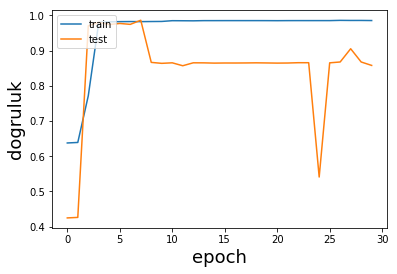

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

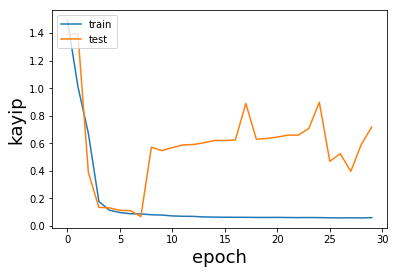

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()

### Binary classification

In [21]:
y = verikumesi['label'].apply(lambda d:0 if d == 'normal.' else 1).as_matrix()

c:\users\ozgur\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [22]:
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim=X.shape[1], activation='relu', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(100, activation='sigmoid', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(60, input_dim=X.shape[1], activation='relu', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(20, activation='tanh', kernel_initializer='uniform' ))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

#plot_model(model, show_shapes=True, to_file="multiclass.png")
#Image("multiclass.png")
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                700       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 60)                1260      
_________________________________________________________________
dropout_2 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               6100      
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
___________________________

In [23]:
history = model.fit(X, y, epochs=10, batch_size=1024, verbose=1, validation_split=0.2)

Train on 395216 samples, validate on 98804 samples
Epoch 1/10
395216/395216 [==============================] - 3s 7us/step - loss: 0.1770 - acc: 0.9387 - val_loss: 0.0229 - val_acc: 0.9965
Epoch 2/10
395216/395216 [==============================] - 3s 6us/step - loss: 0.0357 - acc: 0.9895 - val_loss: 0.0149 - val_acc: 0.9959
Epoch 3/10
395216/395216 [==============================] - 2s 6us/step - loss: 0.0285 - acc: 0.9911 - val_loss: 0.0132 - val_acc: 0.9953
Epoch 4/10
395216/395216 [==============================] - 2s 6us/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0126 - val_acc: 0.9970
Epoch 5/10
395216/395216 [==============================] - 2s 6us/step - loss: 0.0237 - acc: 0.9919 - val_loss: 0.0130 - val_acc: 0.9950
Epoch 6/10
395216/395216 [==============================] - 2s 6us/step - loss: 0.0249 - acc: 0.9904 - val_loss: 0.0129 - val_acc: 0.9975
Epoch 7/10
395216/395216 [==============================] - 2s 6us/step - loss: 0.0241 - acc: 0.9905 - val_loss: 0.0117 -

### Sınıflandırma modelinin performansına bakalım.

In [24]:
y_pred = model.predict_classes(X)

In [25]:
pd.set_option('display.max_columns', 500)
cm = confusion_matrix(y, y_pred)
cm = pd.DataFrame(cm)
cm

,0,1
0,96614,663
1,1187,395556


In [26]:
accuracy_score(y, y_pred)

0.9962552123395814

### Eğitim tarihçesini inceliyelim.

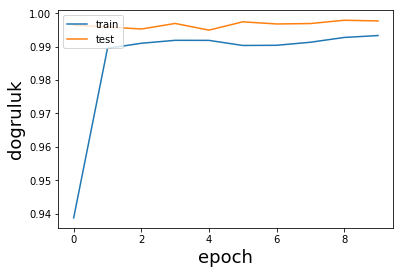

In [27]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('dogruluk', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Kayıp fonksiyonunun değişimi

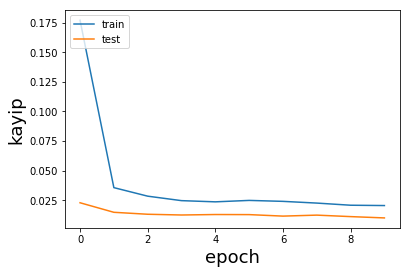

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.ylabel('kayip', fontsize=18)
plt.xlabel('epoch', fontsize=18)
plt.legend(['train', 'test'], loc='upper left')

plt.show()